# Determining forest cover type based on cartographic variables using classification

-----

## Frame the problem

### Problem
Predicting forest cover type can aid in advancing classifying and mapping forests. Natural resource managers responsible for developing ecosystem management strategies require basic descriptive information including inventory data for forested lands to support their decision-making processes.  However, managers generally do not have this type of data for inholdings or neighboring lands that are outside their immediate jurisdiction.  One method of obtaining this information is through the use of predictive models.  Predicting forest cover type from cartographic variables only (no remotely sensed data). The actual forest cover type for a given observation (30 x 30 meter cell) was determined from US Forest Service (USFS) Region 2 Resource Information System (RIS) data. Independent variables were derived from data originally obtained from US Geological Survey (USGS) and USFS data. Data is in raw form (not scaled) and contains binary (0 or 1) columns of data for qualitative independent variables (wilderness areas and soil types).

### Target & feature variables
**target variable:**
- Cover_Type (7 types) / integer / 1 to 7 / Forest Cover Type designation
    - 1 -- Spruce/Fir
    - 2 -- Lodgepole Pine
    - 3 -- Ponderosa Pine
    - 4 -- Cottonwood/Willow
    - 5 -- Aspen
    - 6 -- Douglas-fir
    - 7 -- Krummholz

**feature variables:** 
- Elevation / quantitative /meters / Elevation in meters
- Aspect / quantitative / azimuth / Aspect in degrees azimuth
- Slope / quantitative / degrees / Slope in degrees
- Horizontal_Distance_To_Hydrology / quantitative / meters / Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology / quantitative / meters / Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways / quantitative / meters / Horz Dist to nearest roadway
- Hillshade_9am / quantitative / 0 to 255 index / Hillshade index at 9am, summer solstice
- Hillshade_Noon / quantitative / 0 to 255 index / Hillshade index at noon, summer soltice
- Hillshade_3pm / quantitative / 0 to 255 index / Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points / quantitative / meters / Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns) / qualitative / 0 (absence) or 1 (presence) / Wilderness area designation
- Soil_Type (40 binary columns) / qualitative / 0 (absence) or 1 (presence) / Soil Type designation


**Soil type codes:**

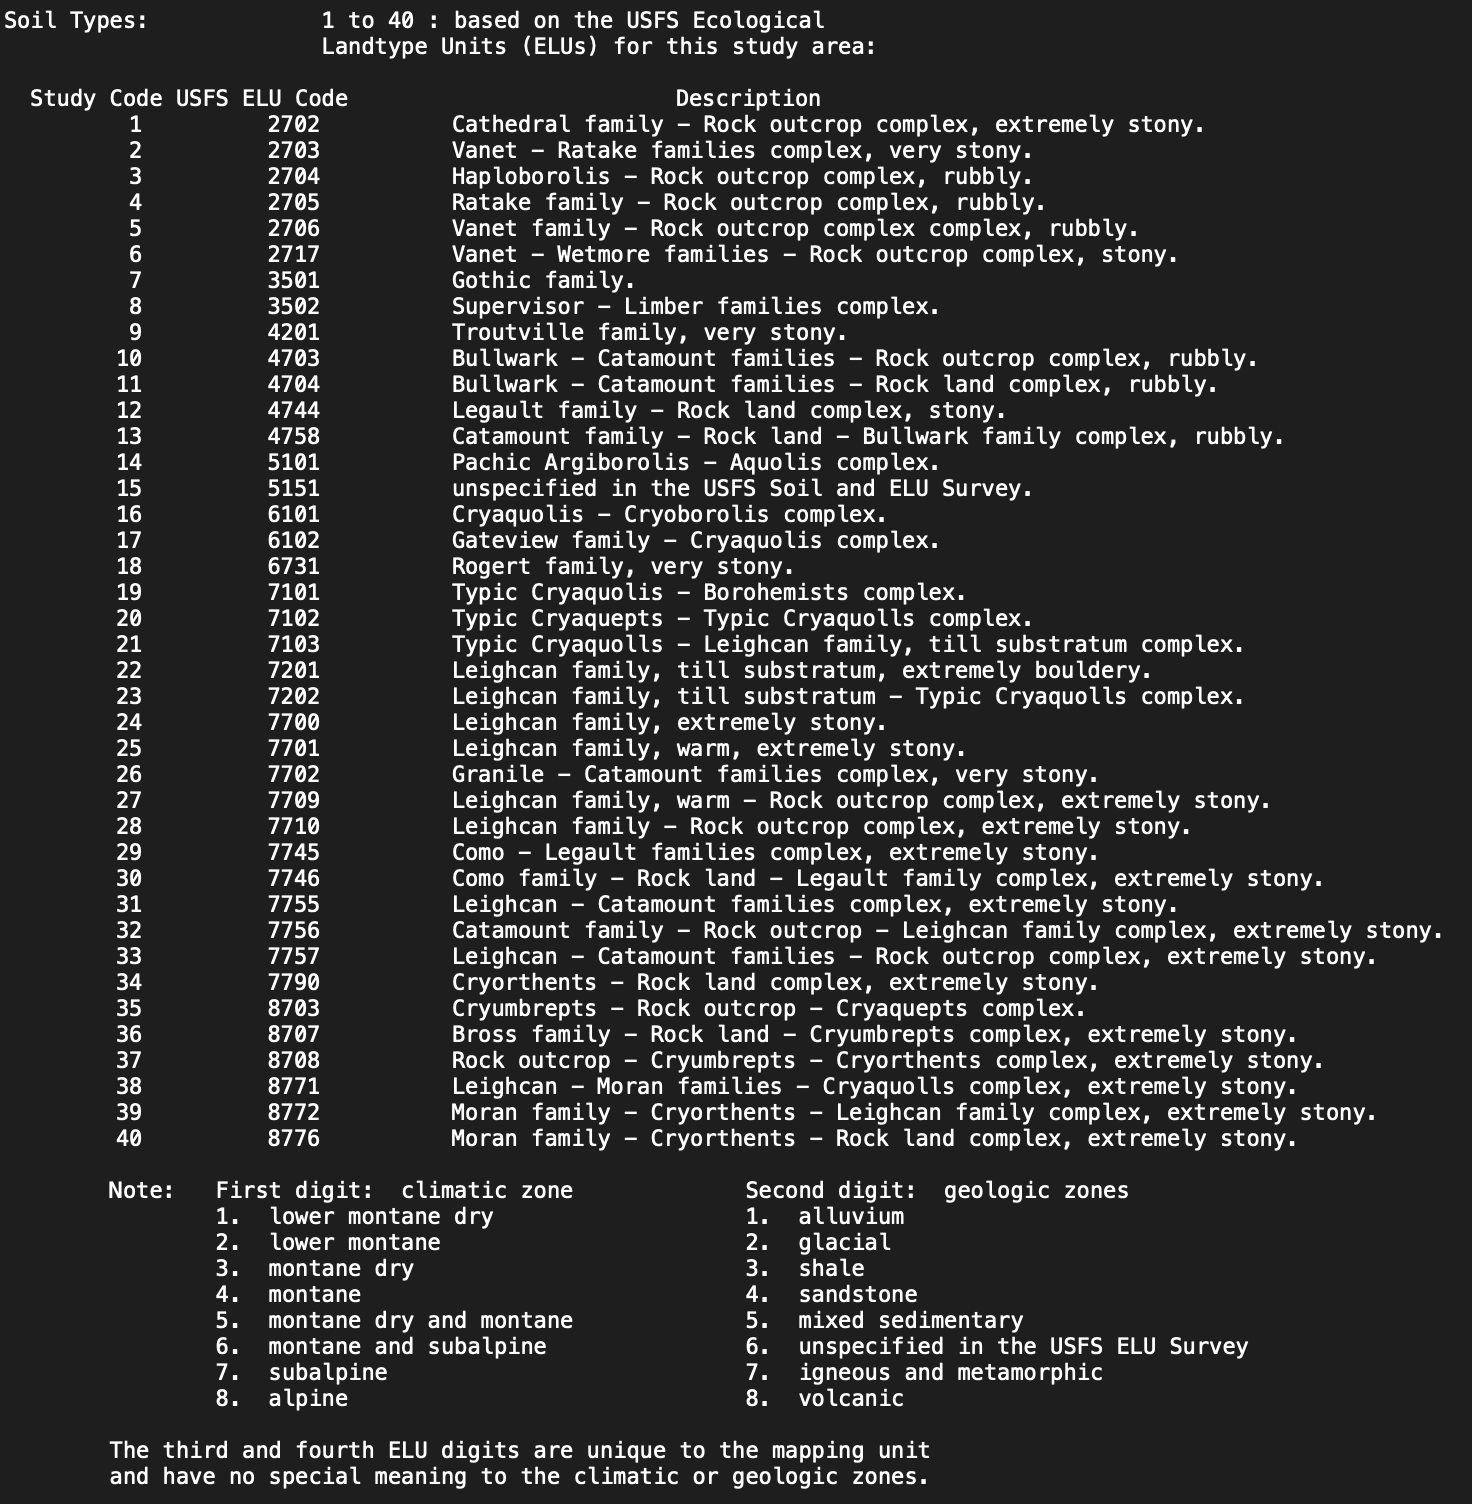

In [1]:
from IPython.display import Image
Image(filename="/Users/frankiechiappetta/Desktop/DS-COURSE/projects/final_project_report/soil_types.png", width = 600, height = 300)

### Goals and success metrics

**The study from which this data set was derived had these results:**

The final neural network model had a higher absolute 
	classification accuracy (70.58%) than the final corresponding 
	linear discriminant analysis model( 58.38%).  In support of these 
	classification results, thirty additional networks with randomly 
	selected initial weights were derived.  From these networks, the 
	overall mean absolute classification accuracy for the neural 
	network method was 70.52%, with a 95% confidence interval of 
	70.26% to 70.80%

My goal is to predict the forest cover type based on feature variables using logistic regression & random forest. Considering the accuracy for the neural network conducted in the study was (70.58%), I expect a lower value than that.

### Risks or limitations
* there are many factors that influence forest cover type
* Specific to Colorado tree species and only 7 tree species
* There may be other accurate ways to determine forest cover type, like using remote sensing images

### Data Sources
Forest type mapping data set information from: http://archive.ics.uci.edu/ml/datasets/Covertype
data from: http://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz
data set description from: http://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info 

----

## Reading in and clean the data

In [10]:
import pandas as pd
import gzip
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use("fivethirtyeight")
pd.set_option('display.max_columns', 100)

In [11]:
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz"

In [12]:
df = pd.read_csv(url, header=None,compression="gzip")

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [14]:
#create column names
df.columns = ["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
              "Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon", "Hillshade_3pm","Horizontal_Distance_To_Fire_Points",
             "Rawah Wilderness Area", "Neota Wilderness Area", "Comanche Peak Wilderness Area", "Cache la Poudre Wilderness Area", 
              "soil_type1","soil_type2", "soil_type3", "soil_type4", "soil_type5", "soil_type6", "soil_type7", "soil_type8", "soil_type9", 
              "soil_type10", "soil_type11","soil_type12", "soil_type13", "soil_type14", "soil_type15", "soil_type16", "soil_type17", "soil_type18", "soil_type19", "soil_type20", 
              "soil_type21","soil_type22", "soil_type23", "soil_type24", "soil_type25", "soil_type26", "soil_type27", "soil_type28", "soil_type29", "soil_type30",
              "soil_type31","soil_type32", "soil_type33", "soil_type34", "soil_type35", "soil_type36", "soil_type37", "soil_type38", "soil_type39", "soil_type40",
              "cover_type"]

In [15]:
df.drop(["Rawah Wilderness Area", "Neota Wilderness Area", "Comanche Peak Wilderness Area", "Cache la Poudre Wilderness Area"], axis=1, inplace=True)

In [16]:
df.shape

(581012, 51)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 51 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  soil_type1                          581012 non-null  int64
 11  soil_type2                          581012 non-null 

In [9]:
df.isna().any()

Elevation                             False
Aspect                                False
Slope                                 False
Horizontal_Distance_To_Hydrology      False
Vertical_Distance_To_Hydrology        False
Horizontal_Distance_To_Roadways       False
Hillshade_9am                         False
Hillshade_Noon                        False
Hillshade_3pm                         False
Horizontal_Distance_To_Fire_Points    False
soil_type1                            False
soil_type2                            False
soil_type3                            False
soil_type4                            False
soil_type5                            False
soil_type6                            False
soil_type7                            False
soil_type8                            False
soil_type9                            False
soil_type10                           False
soil_type11                           False
soil_type12                           False
soil_type13                     

---

## First Pass Logistic Regression

In [18]:
df_subset = df.sample(frac=0.25, replace=False, random_state=1)
df_subset

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,soil_type1,soil_type2,soil_type3,soil_type4,soil_type5,soil_type6,soil_type7,soil_type8,soil_type9,soil_type10,soil_type11,soil_type12,soil_type13,soil_type14,soil_type15,soil_type16,soil_type17,soil_type18,soil_type19,soil_type20,soil_type21,soil_type22,soil_type23,soil_type24,soil_type25,soil_type26,soil_type27,soil_type28,soil_type29,soil_type30,soil_type31,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40,cover_type
376969,2949,101,21,693,151,3009,250,206,74,595,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
59897,3198,156,10,510,23,3900,232,241,140,4221,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
247100,2199,2,18,323,78,540,193,204,147,150,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
111532,2851,111,14,150,27,2394,243,224,107,2290,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
522294,2920,47,21,335,119,2292,222,189,92,2059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331831,2505,315,14,60,2,234,183,228,185,684,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
112096,2926,189,7,170,10,5010,221,246,160,1917,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
254927,2232,72,35,331,-57,607,234,150,0,467,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
564267,2705,30,26,190,32,1806,202,174,95,2042,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [41]:
# Split the data into the column `y` we want to predict and the
# columns `X` we will use to make the predictions
X = df_subset.drop("cover_type", axis=1)
y = df_subset.loc[:, "cover_type"]

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
# Import a model class
from sklearn.linear_model import LogisticRegression

# Create a model from that class
lr = LogisticRegression(solver='lbfgs', max_iter=10000, n_jobs = -1)

# Ask the model to learn a function that predicts `y` from `X`
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, n_jobs=-1)

In [15]:
# Score the model on the test data
print(lr.score(X_test, y_test))
print(lr.score(X_train,y_train))

0.7017954507903288
0.6992996080375256


In [16]:
print(y_test.value_counts(normalize=True))

2    0.487581
1    0.364460
3    0.061464
7    0.034284
6    0.031393
5    0.016247
4    0.004571
Name: cover_type, dtype: float64


In [17]:
print('Logistic Regression score for training set: %f' % lr.score(X_train, y_train))
y_true, y_pred = y_test, lr.predict(X_test)
report = classification_report(y_true=y_test, y_pred=y_pred, output_dict=True)
pd.DataFrame(report).transpose()

Logistic Regression score for training set: 0.699300


,precision,recall,f1-score,support
1,0.686033,0.697696,0.691815,13235.000000
2,0.731052,0.802440,0.765084,17706.000000
3,0.644195,0.693548,0.667961,2232.000000
4,0.511364,0.271084,0.354331,166.000000
5,0.000000,0.000000,0.000000,590.000000
6,0.423006,0.200000,0.271590,1140.000000
7,0.572165,0.178313,0.271892,1245.000000
accuracy,0.701795,0.701795,0.701795,0.701795
macro avg,0.509688,0.406154,0.431811,36314.000000
weighted avg,0.681306,0.701795,0.685702,36314.000000


#### What does this  mean?

- My model gets the right answer 70% of the time on the test set. Its not really overfitting since they test score and train score are nearly identical

---

## Look at the data further

Explore the data, looking for insights that might help you improve your model.
For each variable individually (including categorical variables):
- ✓ Look at the descriptive statistics.
- ✓ Visualize the distribution.
- ✓ Note which variables appear to be roughly normally distributed and which appear to be strongly skewed, as well as any other potentially important observations.
- For each potential feature variable:
    - ✓ Measure its correlation with the target variable.
    - ✓ Visualize its relationship with the target variable.
- ✓ Note which feature variables appear to be roughly linearly related to the target, related to it but not linearly, and unrelated to it, as well as any other potentially important observations.

In [20]:
#Look at the descriptive statistics.
df_subset.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,soil_type1,soil_type2,soil_type3,soil_type4,soil_type5,soil_type6,soil_type7,soil_type8,soil_type9,soil_type10,soil_type11,soil_type12,soil_type13,soil_type14,soil_type15,soil_type16,soil_type17,soil_type18,soil_type19,soil_type20,soil_type21,soil_type22,soil_type23,soil_type24,soil_type25,soil_type26,soil_type27,soil_type28,soil_type29,soil_type30,soil_type31,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40,cover_type
count,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000,145253.000000
mean,2958.728735,155.378842,14.092267,269.636916,46.197848,2349.707614,212.151246,223.249640,142.468183,1973.338878,0.005439,0.012819,0.008434,0.021163,0.002726,0.011215,0.000200,0.000303,0.001983,0.057087,0.021569,0.051627,0.029363,0.001012,0.000007,0.004695,0.005866,0.003215,0.006733,0.015924,0.001556,0.058078,0.098979,0.036364,0.000929,0.004482,0.002086,0.001494,0.197813,0.051600,0.044619,0.090539,0.077506,0.002878,0.003236,0.000186,0.000489,0.027194,0.023559,0.015036,2.052150
std,280.513695,112.026638,7.478891,213.079948,58.204929,1563.390954,26.705138,19.810047,38.184629,1320.711407,0.073548,0.112493,0.091447,0.143928,0.052143,0.105305,0.014128,0.017402,0.044484,0.232009,0.145273,0.221274,0.168821,0.031796,0.002624,0.068361,0.076363,0.056611,0.081779,0.125182,0.039414,0.233892,0.298635,0.187195,0.030472,0.066797,0.045625,0.038623,0.398352,0.221218,0.206466,0.286953,0.267394,0.053567,0.056792,0.013633,0.022104,0.162649,0.151671,0.121696,1.396746
min,1863.000000,0.000000,0.000000,0.000000,-166.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2808.000000,58.000000,9.000000,108.000000,7.000000,1101.000000,198.000000,213.000000,119.000000,1020.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,29.000000,1994.000000,218.000000,226.000000,143.000000,1706.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3164.000000,260.000000,18.000000,390.000000,68.000000,3325.000000,231.000000,237.000000,168.000000,2547.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [21]:
#prepare for histogram
df_subset_no_soil_no_covertype = df_subset.drop(columns=["soil_type1","soil_type2", "soil_type3", "soil_type4", "soil_type5", "soil_type6", "soil_type7", "soil_type8", "soil_type9", 
              "soil_type10", "soil_type11","soil_type12", "soil_type13", "soil_type14", "soil_type15", "soil_type16", "soil_type17", "soil_type18", "soil_type19", "soil_type20", 
              "soil_type21","soil_type22", "soil_type23", "soil_type24", "soil_type25", "soil_type26", "soil_type27", "soil_type28", "soil_type29", "soil_type30",
              "soil_type31","soil_type32", "soil_type33", "soil_type34", "soil_type35", "soil_type36", "soil_type37", "soil_type38", "soil_type39", "soil_type40",
                                           "cover_type"])
df_subset_no_soil_no_covertype.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')

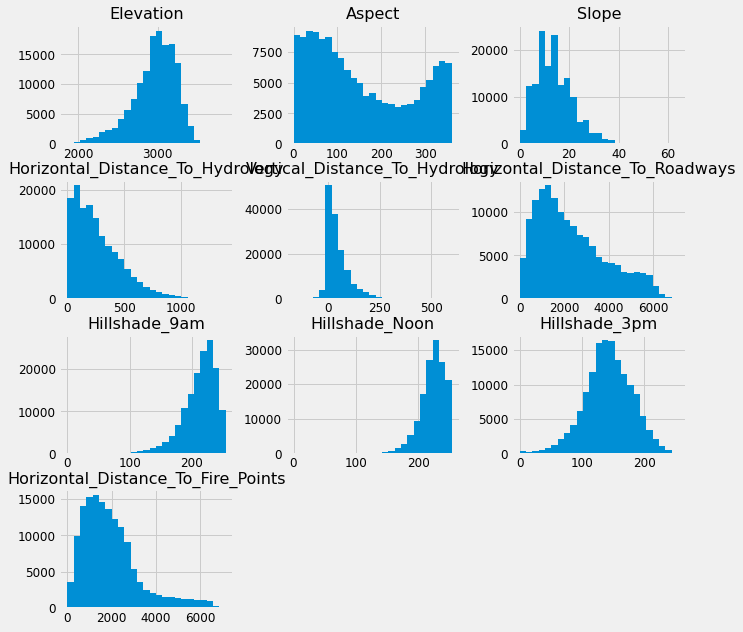

In [22]:
# Visualize distributions of each column
import matplotlib

params = {'axes.titlesize':'16',
          'xtick.labelsize':'12',
          'ytick.labelsize':'12'}
matplotlib.rcParams.update(params)
df_subset_no_soil_no_covertype.hist(figsize=(10, 10), bins=25);

- hillshade at 3pm is about normall distributed
- slope, historizontal_distance, vertical_distance, distance_to_roadway, and horizontal_distance_to_fire_points are right skewed
- elevation, hillshde 9am and hillshade noon are left skewed

In [23]:
#prepare for heatmap
df_subset_no_soil = df_subset.drop(columns=["soil_type1","soil_type2", "soil_type3", "soil_type4", "soil_type5", "soil_type6", "soil_type7", "soil_type8", "soil_type9", 
              "soil_type10", "soil_type11","soil_type12", "soil_type13", "soil_type14", "soil_type15", "soil_type16", "soil_type17", "soil_type18", "soil_type19", "soil_type20", 
              "soil_type21","soil_type22", "soil_type23", "soil_type24", "soil_type25", "soil_type26", "soil_type27", "soil_type28", "soil_type29", "soil_type30",
              "soil_type31","soil_type32", "soil_type33", "soil_type34", "soil_type35", "soil_type36", "soil_type37", "soil_type38", "soil_type39", "soil_type40"])
df_subset_no_soil.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'cover_type'],
      dtype='object')

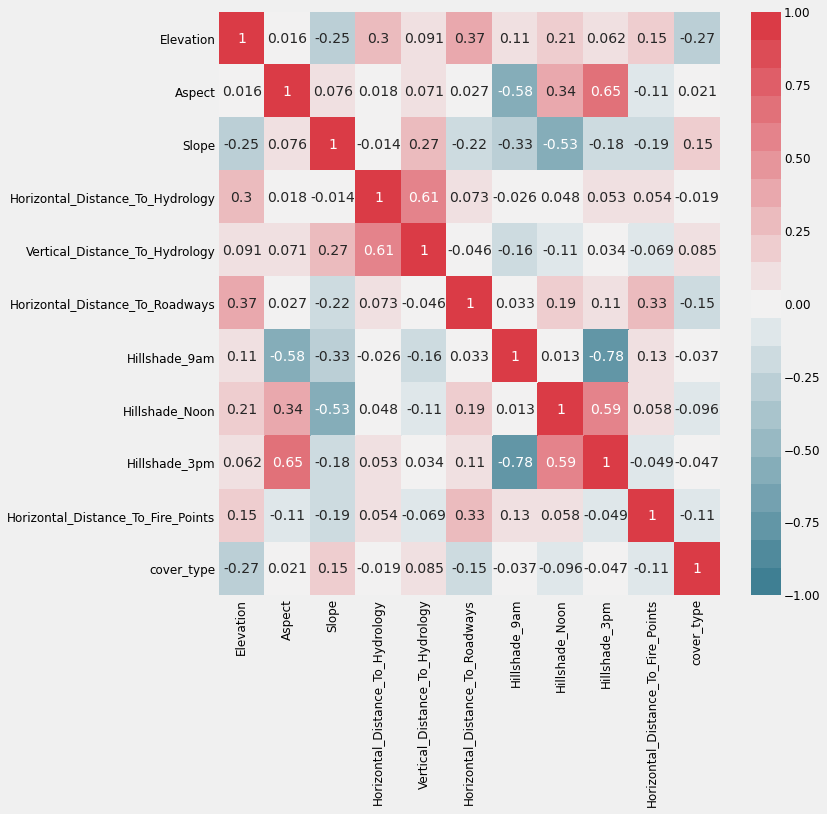

In [24]:
#correlation map without dummy coded soils 
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(
    df_subset_no_soil.corr(),
    vmin=-1,
    vmax=1,
    cmap=sns.diverging_palette(220, 10, n=21),
    annot=True,
    ax=ax,
)

In [25]:
cover_type_values = df_subset.cover_type.value_counts().sort_index()
cover_type_values

1    52937
2    70781
3     9009
4      685
5     2352
6     4368
7     5121
Name: cover_type, dtype: int64

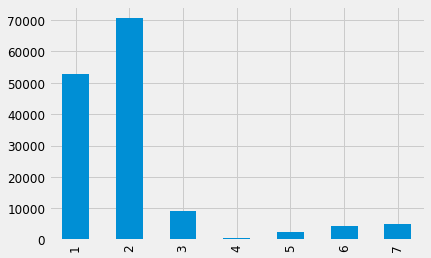

In [26]:
# number of each cover type in this dataset
cover_type_values.plot.bar();

In [27]:
df_subset_no_soil.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'cover_type'],
      dtype='object')

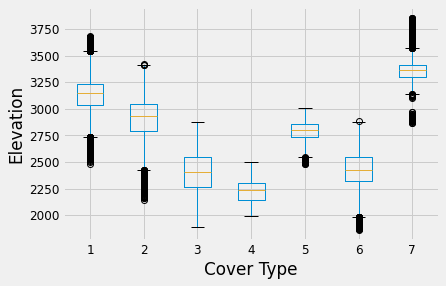

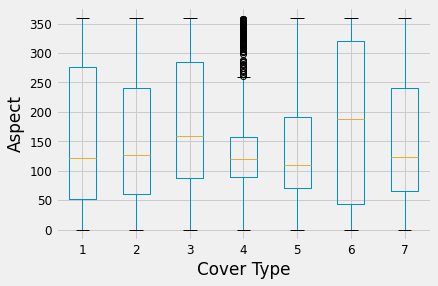

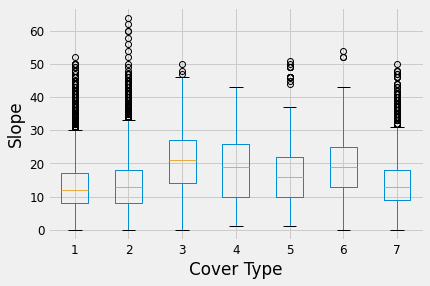

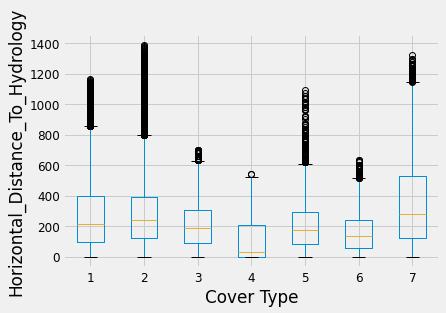

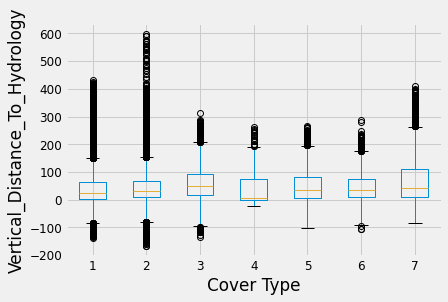

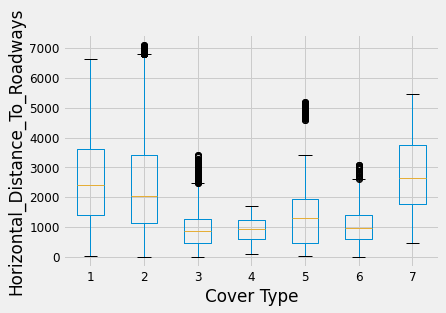

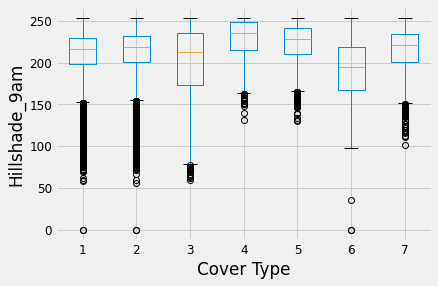

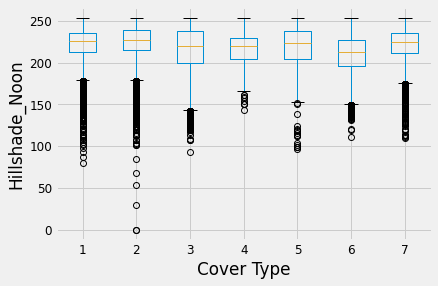

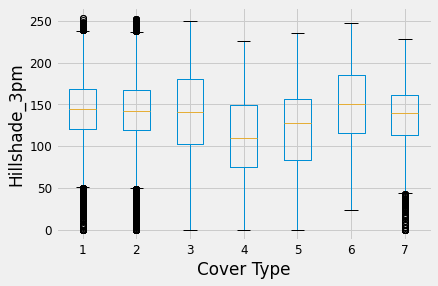

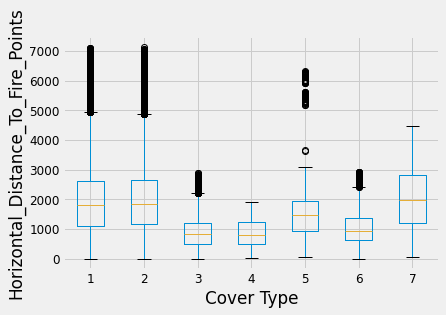

In [28]:
for feature in df_subset_no_soil_no_covertype.columns:
    ax = df_subset_no_soil.assign(index=df_subset_no_soil.groupby('cover_type').cumcount()).pivot('index','cover_type',feature).plot(kind='box')
    ax.set(xlabel="Cover Type", ylabel=feature);

In [29]:
df_soils = df_subset.drop(columns = ["Elevation","Aspect","Slope","Horizontal_Distance_To_Hydrology","Vertical_Distance_To_Hydrology",
              "Horizontal_Distance_To_Roadways","Hillshade_9am","Hillshade_Noon", "Hillshade_3pm","Horizontal_Distance_To_Fire_Points"])

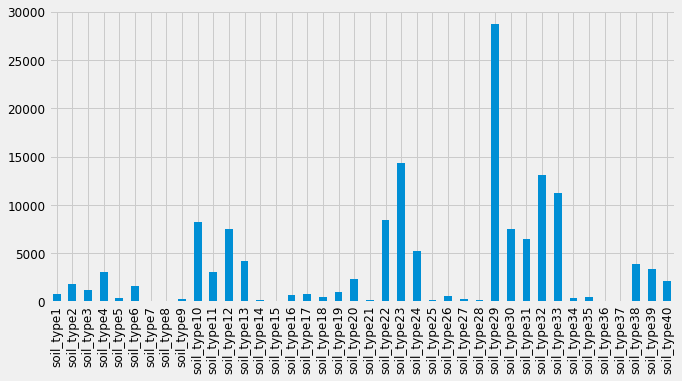

In [30]:
df_soils.drop(columns="cover_type").sum().plot.bar(figsize=(10, 5));

In [49]:
#correlation between cover type and each soil type
corr_matrix = df_soils.corr()
corr_matrix["cover_type"].sort_values(ascending=False)

cover_type     1.000000
soil_type10    0.247261
soil_type38    0.156069
soil_type39    0.152726
soil_type40    0.128803
soil_type2     0.122505
soil_type6     0.112479
soil_type4     0.099783
soil_type1     0.091265
soil_type17    0.085820
soil_type37    0.078338
soil_type35    0.077374
soil_type5     0.074238
soil_type3     0.070400
soil_type14    0.063764
soil_type11    0.036257
soil_type36    0.025523
soil_type13    0.024980
soil_type16    0.010198
soil_type18    0.007979
soil_type15    0.007416
soil_type34    0.005999
soil_type7    -0.000528
soil_type26   -0.001251
soil_type28   -0.002593
soil_type8    -0.004615
soil_type9    -0.005321
soil_type25   -0.006800
soil_type30   -0.008664
soil_type27   -0.015103
soil_type12   -0.023970
soil_type21   -0.025360
soil_type20   -0.028178
soil_type19   -0.038575
soil_type33   -0.062289
soil_type31   -0.065436
soil_type24   -0.067314
soil_type32   -0.077088
soil_type29   -0.126166
soil_type23   -0.133407
soil_type22   -0.142522
Name: cover_type

### Trends in the data
- cover type does not seem strongly correlated with any particular soil type
- soil type 29 is significantly more frequent than the other soil types
- cover type does not seem strongly correlated with any particular feature as seen in the correlation map
- As shown in the box plots, elevation has an "influence" on cover type

---

## EDA conclusions

**Shortcomings of the data**
- Aspect, elevation, and slope and too closely related (aspect and slope is calculated from elevation models usually)
- cover types 1 and 2 are much more frequent while the others are not that frequent
- some soil types are much more frequent while the others are not that frequent


**Any assumptions that are needed to make in light of those shortcomings**
- maybe only keep either aspect or elevation or slope


**Five things to try as ways to improve the model**
- increase number of iterations in the model or standarize the data
- try k-fold cross validation using grid search cv
- remove some features using regularization
- try random forest classifier


**What the most appropriate metric for evaluating the models will be**
- Classification Accuracy:
    - number of correct predictions divided by the total number of predictions, multiplied by 100. 
- Precision: 
    - useful when class distribution is imbalanced (as in this model) 
    - defined as: Precision= True_Positive/ (True_Positive+ False_Positive)
- Recall 
    - defined as the fraction of samples from a class which are correctly predicted by the model
- F1-score
    - probably would make Fb higher to give more preference to precision
- Sensitivity and Specificity
- ROC and AUC curves

---

### **TUNE THE LOGISTIC REGRESSION MODEL**

1. GridSearchCV or RandomizedSearchCV 

     **scale features**

2. l2 penalty in logistic regression model
3. l1 penalty in logistic regression model

### gridsearchCV

In [86]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


lr_grid = GridSearchCV(
    estimator = LogisticRegression(solver='lbfgs', max_iter=10000),
    param_grid={},
    cv=KFold(n_splits = 5, shuffle = True),
    return_train_score = True,
    n_jobs = -1
)

In [87]:
lr_grid.fit(X, y)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(max_iter=10000), n_jobs=-1,
             param_grid={}, return_train_score=True)

In [88]:
score = pd.DataFrame(lr_grid.cv_results_).loc[:, ["mean_train_score", "mean_test_score"]]
score

,mean_train_score,mean_test_score
0,0.700529,0.700027


In [91]:
print('Logistic Regression score for training set: %f' % score['mean_test_score'].iloc[0])
from sklearn.metrics import classification_report
y_true, y_pred = y_test, lr_grid.predict(X_test)
report = classification_report(y_true=y_test, y_pred=y_pred, output_dict=True)
pd.DataFrame(report).transpose()

Logistic Regression score for training set: 0.700027


,precision,recall,f1-score,support
1,0.686458,0.697091,0.691734,13235.000000
2,0.731226,0.803456,0.765641,17706.000000
3,0.643351,0.708781,0.674483,2232.000000
4,0.526316,0.301205,0.383142,166.000000
5,0.000000,0.000000,0.000000,590.000000
6,0.430063,0.180702,0.254478,1140.000000
7,0.574026,0.177510,0.271166,1245.000000
accuracy,0.702511,0.702511,0.702511,0.702511
macro avg,0.513063,0.409821,0.434378,36314.000000
weighted avg,0.681848,0.702511,0.685914,36314.000000


### l2 penalty in logistic regression model (Ridge) 

In [33]:
from sklearn.datasets import make_classification
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


In [78]:
pipe_l2 = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("lr", LogisticRegression(solver="liblinear", penalty="l2",max_iter=1_000)),
    ]
)

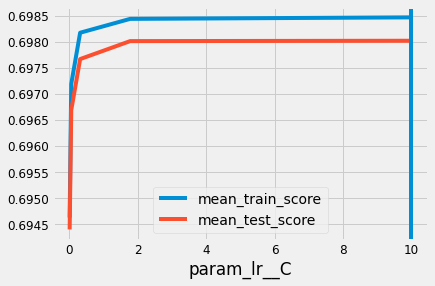

In [79]:
from sklearn.model_selection import GridSearchCV, KFold

grid_l2 = GridSearchCV(
    estimator=pipe_l2,
    param_grid={"lr__C": np.logspace(-2, 1, 5)},
    return_train_score=True,
    cv=KFold(10, shuffle=True, random_state=2),
)
grid_l2.fit(X, y)

ax = (
    pd.DataFrame(grid_l2.cv_results_)
    .loc[:, ["param_lr__C", "mean_train_score", "mean_test_score"]]
    .plot(x="param_lr__C")
)
# fmt: off
ax.axvline(grid_l2.best_params_["lr__C"]);

In [83]:
score = pd.DataFrame(grid_l2.cv_results_).loc[:, ["mean_train_score", "mean_test_score"]]
score

,mean_train_score,mean_test_score
0,0.694630,0.694402
1,0.697188,0.696688
2,0.698170,0.697665
3,0.698436,0.698010
4,0.698465,0.698017


In [84]:
grid_l2.best_score_

0.6980166069363902

In [85]:
grid_l2.best_params_["lr__C"]

10.0

- **With Lasso regression, I am getting a test score of 0.70 and test score of 0.70**

---

## Random Forest Classification

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [44]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [45]:
scaler.fit(X_train)

StandardScaler()

In [46]:
scaler.mean_

array([2.95900902e+03, 1.55030283e+02, 1.41064449e+01, 2.69456301e+02,
       4.61317894e+01, 2.34905643e+03, 2.12205987e+02, 2.23181909e+02,
       1.42322061e+02, 1.97398107e+03, 5.42505439e-03, 1.27961520e-02,
       8.77555329e-03, 2.11402712e-02, 2.67121967e-03, 1.10704156e-02,
       1.46871185e-04, 2.66204022e-04, 2.03783769e-03, 5.68575074e-02,
       2.20490366e-02, 5.19006049e-02, 2.95211081e-02, 1.02809829e-03,
       9.17944905e-06, 4.81003130e-03, 5.84730904e-03, 3.17608937e-03,
       6.76525395e-03, 1.60089591e-02, 1.57886524e-03, 5.82527837e-02,
       9.93399976e-02, 3.66443606e-02, 9.45483252e-04, 4.45203279e-03,
       2.06537604e-03, 1.50542964e-03, 1.96109749e-01, 5.17904515e-02,
       4.42633033e-02, 9.01330102e-02, 7.72083460e-02, 2.97414149e-03,
       3.21280717e-03, 1.37691736e-04, 5.04869698e-04, 2.79789607e-02,
       2.34993896e-02, 1.51001937e-02])

In [47]:
scaler.scale_

array([2.80682876e+02, 1.12079207e+02, 7.47855731e+00, 2.12897153e+02,
       5.81113581e+01, 1.56381925e+03, 2.66702024e+01, 1.98246775e+01,
       3.82118256e+01, 1.32037861e+03, 7.34549057e-02, 1.12393997e-01,
       9.32659796e-02, 1.43851869e-01, 5.16147678e-02, 1.04632029e-01,
       1.21181522e-02, 1.63135881e-02, 4.50963957e-02, 2.31570143e-01,
       1.46843034e-01, 2.21826356e-01, 1.69261964e-01, 3.20474852e-02,
       3.02974665e-03, 6.91873898e-02, 7.62438064e-02, 5.62672358e-02,
       8.19724666e-02, 1.25509651e-01, 3.97035568e-02, 2.34220829e-01,
       2.99117974e-01, 1.87887071e-01, 3.07341718e-02, 6.65748616e-02,
       4.53994522e-02, 3.87706503e-02, 3.97052535e-01, 2.21603702e-01,
       2.05679516e-01, 2.86372224e-01, 2.66921744e-01, 5.44545313e-02,
       5.65905031e-02, 1.17334043e-02, 2.24636329e-02, 1.64912518e-01,
       1.51483228e-01, 1.21951539e-01])

In [48]:
#scaled X_train
Xs_train = scaler.transform(X_train)
Xs_train

array([[ 1.59251246, -0.68728433,  1.59035421, ..., -0.16965941,
        -0.15512866,  8.07615726],
       [-0.29573954,  0.77596656,  0.25319791, ..., -0.16965941,
        -0.15512866, -0.12382126],
       [ 0.59494537, -0.86572957, -0.68281149, ..., -0.16965941,
        -0.15512866, -0.12382126],
       ...,
       [ 1.57113602,  1.78418212,  0.38691354, ..., -0.16965941,
        -0.15512866,  8.07615726],
       [ 0.92271741, -0.89249635, -0.14794898, ..., -0.16965941,
        -0.15512866, -0.12382126],
       [ 1.41793822,  0.78488883, -0.14794898, ...,  5.89416166,
        -0.15512866, -0.12382126]])

In [49]:
#scaled X_test
Xs_test = scaler.transform(X_test)
Xs_test

array([[ 0.67688838, -0.38392744, -1.48510527, ..., -0.16965941,
        -0.15512866, -0.12382126],
       [-1.23986553, -0.49991684, -0.01423335, ..., -0.16965941,
        -0.15512866, -0.12382126],
       [ 0.25292236, -0.33931613, -0.41538023, ..., -0.16965941,
        -0.15512866, -0.12382126],
       ...,
       [ 0.24223415,  1.74849308, -0.68281149, ..., -0.16965941,
        -0.15512866, -0.12382126],
       [-1.99872907,  0.48153193, -0.95024275, ..., -0.16965941,
        -0.15512866, -0.12382126],
       [-1.48213183, -1.1601642 , -0.2816646 , ..., -0.16965941,
        -0.15512866, -0.12382126]])

### first pass RFC

In [50]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(Xs_train, y_train)

print(rfc.score(Xs_train,y_train), "is the train score")
print(rfc.score(Xs_test,y_test), "is the test score")

1.0 is the train score
0.9097042462961943 is the test score


 - Here, the model is overfitting and has high variance

### **TUNE THE RF MODEL**

#### Increase train size

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.15)

In [52]:
scaler2 = StandardScaler()
scaler.fit(X_train)
Xscaler2_train = scaler.transform(X_train)
Xscaler2_test = scaler.transform(X_test)

In [53]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(Xscaler2_train, y_train)

print(rfc.score(Xscaler2_train,y_train), "is the train score")
print(rfc.score(Xscaler2_test,y_test), "is the test score")

1.0 is the train score
0.9124747567468331 is the test score


#### Hyperparamater tuning

In [55]:
param_distributions = {'bootstrap': [True, False],
               'max_depth': range(1,200),
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': range(1,11),
               'min_samples_split': range(1,11),
               'n_estimators': range(10,500,50)}

In [56]:
from sklearn.model_selection import RandomizedSearchCV

In [57]:
randomized_grid = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state = 42),
    param_distributions=param_distributions,
    cv=KFold(n_splits=10, shuffle=True),
    n_iter = 5,
    return_train_score=True,
    n_jobs = -1
)
randomized_grid.fit(Xscaler2_train, y_train)
best_params = randomized_grid.best_params_
best_params

{'n_estimators': 310,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 154,
 'bootstrap': False}

In [58]:
rfc = RandomForestClassifier()
rfc.set_params(**randomized_grid.best_params_)

rfc.fit(Xscaler2_train, y_train)

print(rfc.score(Xscaler2_train,y_train), "is the train score")
print(rfc.score(Xscaler2_test,y_test), "is the test score")

0.999732717774268 is the train score
0.9190838993941619 is the test score


- this is still overfitting even with best parameters

In [33]:
importances = pd.DataFrame(rfc.feature_importances_.reshape(1, -1), columns=X.columns)
importances

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,soil_type1,soil_type2,soil_type3,soil_type4,soil_type5,soil_type6,soil_type7,soil_type8,soil_type9,soil_type10,soil_type11,soil_type12,soil_type13,soil_type14,soil_type15,soil_type16,soil_type17,soil_type18,soil_type19,soil_type20,soil_type21,soil_type22,soil_type23,soil_type24,soil_type25,soil_type26,soil_type27,soil_type28,soil_type29,soil_type30,soil_type31,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40
0,0.295361,0.043718,0.030191,0.056391,0.050312,0.113606,0.036545,0.039196,0.036954,0.103205,0.003396,0.013208,0.003434,0.014973,0.001277,0.006868,0.000007,0.000027,0.000226,0.019991,0.00307,0.014494,0.004867,0.000418,0.0,0.000769,0.002072,0.000384,0.000937,0.001715,0.000828,0.019933,0.013738,0.003847,0.000221,0.000433,0.000766,0.000154,0.008197,0.004666,0.004149,0.006834,0.005334,0.000699,0.001506,0.000059,0.00057,0.012898,0.011536,0.006017


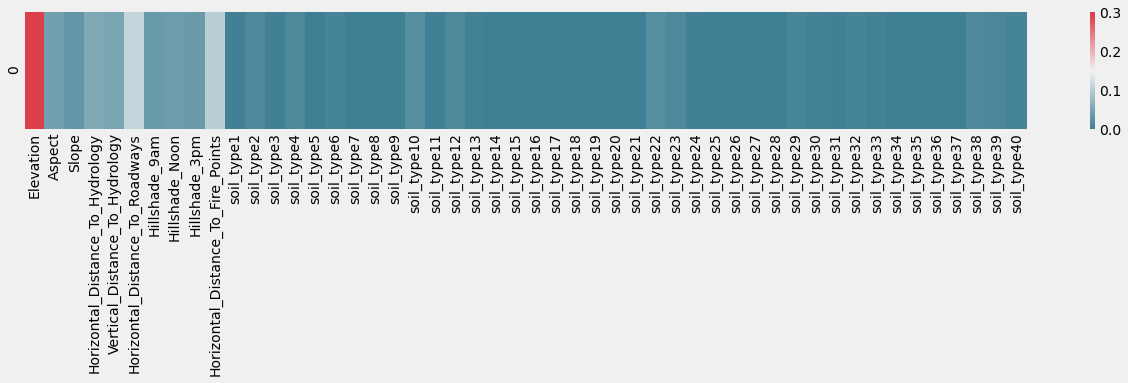

In [34]:
fig, ax = plt.subplots(figsize=(20, 2))
ax = sns.heatmap(
    importances,
    vmin=0,
    vmax=.3,
    cmap=sns.diverging_palette(220, 10, n=200),
    ax=ax,
)
sns.color_palette("mako", as_cmap=True);

 - elevation really is the most important feature, followed by distance to roadways (which is interesting to me), and distance to fire points

## Random Forest without soil data

In [50]:
df_subset_no_soil.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'cover_type'],
      dtype='object')

In [51]:
X2 = df_subset_no_soil.drop(columns="cover_type")
y2 = df_subset_no_soil.loc[:, "cover_type"]

In [53]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size =0.15, random_state=42)

In [54]:
scaler.fit(X2_train)

StandardScaler()

In [56]:
#scaled X_train
X2s_train = scaler.transform(X2_train)
X2s_train

array([[-0.05305249,  1.67562803, -0.41481563, ...,  0.03944037,
         0.5656963 , -0.10674065],
       [-0.25976259, -0.20763126,  0.11980806, ...,  0.3924822 ,
        -0.74254525, -1.05348939],
       [ 1.13731253,  1.29183585,  1.45636727, ..., -0.11186326,
         1.90010268, -0.35536642],
       ...,
       [ 1.57211651,  1.78273282,  0.3871199 , ..., -0.76751236,
         0.30404799,  1.0954559 ],
       [ 0.9234745 , -0.89488701, -0.14750379, ..., -0.61620872,
        -0.76871008, -0.76165731],
       [ 1.41886593,  0.78308808, -0.14750379, ...,  1.35073857,
         1.3244764 , -0.998155  ]])

In [57]:
#scaled X_test
X2s_test = scaler.transform(X2_test)
X2s_test

array([[ 0.67756077, -0.38613925, -1.484063  , ...,  0.64465493,
         0.147059  ,  2.20517579],
       [-1.23985354, -0.50216944, -0.01384786, ..., -0.16229781,
        -1.03035839, -1.11943586],
       [ 0.25344868, -0.34151225, -0.41481563, ...,  0.34204765,
        -0.58555627, -1.12777392],
       ...,
       [-0.20630308, -0.48431864, -1.08309524, ...,  0.44291674,
        -0.1930838 , -0.33490028],
       [-0.0958201 ,  1.69347882,  1.18905543, ..., -1.32229236,
         0.53953147,  0.60730043],
       [ 1.46876147, -0.40399004,  1.32271135, ..., -0.86838145,
        -1.94612748, -0.76696335]])

In [58]:
param_distributions = {'bootstrap': [True, False],
               'max_depth': range(1,200),
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': range(1,11),
               'min_samples_split': range(1,11),
               'n_estimators': range(10,500,50)}

In [59]:
randomized_grid = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state = 42),
    param_distributions=param_distributions,
    cv=KFold(n_splits=10, shuffle=True),
    n_iter = 5,
    return_train_score=True,
    n_jobs = -1
)
randomized_grid.fit(X2s_test, y2_test)
best_params = randomized_grid.best_params_
best_params

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.79080182 0.79383082 0.78694646 0.7849731 ]
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the train scores are non-finite: [       nan 0.93553537 0.93359751 0.91469311 0.91362728]
  warnings.warn(


{'n_estimators': 260,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 14,
 'bootstrap': False}

In [60]:
rfc = RandomForestClassifier()
rfc.set_params(**randomized_grid.best_params_)

rfc.fit(X2s_train, y2_train)

print(rfc.score(X2s_train,y2_train), "is the train score")
print(rfc.score(X2s_test,y2_test), "is the test score")

0.8849633499372291 is the train score
0.8307325133100789 is the test score


---

## XGboost

In [62]:
import xgboost as xgb

In [64]:
xgbc = xgb.XGBClassifier(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, random_state=42)

In [68]:
xgbc.fit(X_train, y_train)

[10:41:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [69]:
print(xgbc.score(X_train,y_train), "is the train score")
print(xgbc.score(X_test,y_test), "is the test score")

0.7794435670027943 is the train score
0.7700569120616854 is the test score


In [70]:
pd.DataFrame(xgbc.feature_importances_.reshape(1, -1), columns=X.columns)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,soil_type1,soil_type2,soil_type3,soil_type4,soil_type5,soil_type6,soil_type7,soil_type8,soil_type9,soil_type10,soil_type11,soil_type12,soil_type13,soil_type14,soil_type15,soil_type16,soil_type17,soil_type18,soil_type19,soil_type20,soil_type21,soil_type22,soil_type23,soil_type24,soil_type25,soil_type26,soil_type27,soil_type28,soil_type29,soil_type30,soil_type31,soil_type32,soil_type33,soil_type34,soil_type35,soil_type36,soil_type37,soil_type38,soil_type39,soil_type40
0,0.152908,0.013785,0.007309,0.026479,0.010147,0.020221,0.013346,0.026872,0.012483,0.017639,0.00509,0.059344,0.017132,0.043705,0.003465,0.007646,0.0,0.00744,0.006792,0.024583,0.010911,0.03315,0.011033,0.004979,0.0,0.01233,0.023383,0.019226,0.009051,0.013015,0.014642,0.0629,0.042178,0.006168,0.011541,0.003642,0.01242,0.00621,0.024364,0.019367,0.014332,0.033941,0.010898,0.005777,0.010277,0.00352,0.007488,0.037767,0.045266,0.013837


---

## Push to gihub

In [59]:
!git add "forest_cover_final_report.ipynb"

In [60]:
!git commit -m "finished project"

[master cc02a12] finished project
 1 file changed, 1314 insertions(+), 746 deletions(-)


In [61]:
!git push

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 8 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 65.36 KiB | 1.92 MiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://git.generalassemb.ly/fachiappetta/final_project_report.git
   8b79e7e..cc02a12  master -> master
